# TD Classification

## Exercice 1

In [9]:
import math
import matplotlib.pyplot as plt
import numpy as np

In [10]:
# 1. (a) Implémentation des fonctions d'impureté

def entropy(probabilities):
    """
    Calcule l'entropie d'une liste de probabilités.
    Formule: -sum(p * log2(p)) avec math bibliothèque
    """
    result = 0
    for p in probabilities:
        if p > 0:
            result -= p * math.log(p, 2)
    return result

def gini(probabilities):
    """
    Calcule l'indice de Gini.
    Formule: 1 - sum(p^2)
    """
    sq_sum = sum([p**2 for p in probabilities])
    return 1 - sq_sum

def classification_error(probabilities):
    """
    Calcule l'erreur de classification.
    Formule: 1 - max(p)
    """
    return 1 - max(probabilities)

In [11]:
# 1. (b) Tests sur les exemples du livre
test_probs = [
    [0.0, 1.0],      # Pur
    [1/6, 5/6],      # Mélangé (0.1667, 0.8333)
    [0.5, 0.5]       # Équiprobable
]

print("--- Tests Exercice 1(b) ---")
for p in test_probs:
    print(f"P={p} -> Entropy: {entropy(p):.4f}, Gini: {gini(p):.4f}, Error: {classification_error(p):.4f}")

--- Tests Exercice 1(b) ---
P=[0.0, 1.0] -> Entropy: 0.0000, Gini: 0.0000, Error: 0.0000
P=[0.16666666666666666, 0.8333333333333334] -> Entropy: 0.6500, Gini: 0.2778, Error: 0.1667
P=[0.5, 0.5] -> Entropy: 1.0000, Gini: 0.5000, Error: 0.5000


In [12]:
# 1. (c) Reproduction de la Fig 4.13 (Fig. 1 du TD) avec matplotlib 
x = np.linspace(0, 1, 100)
y_entropy = [entropy([p, 1-p]) for p in x]
y_gini = [gini([p, 1-p]) for p in x]
y_error = [classification_error([p, 1-p]) for p in x]

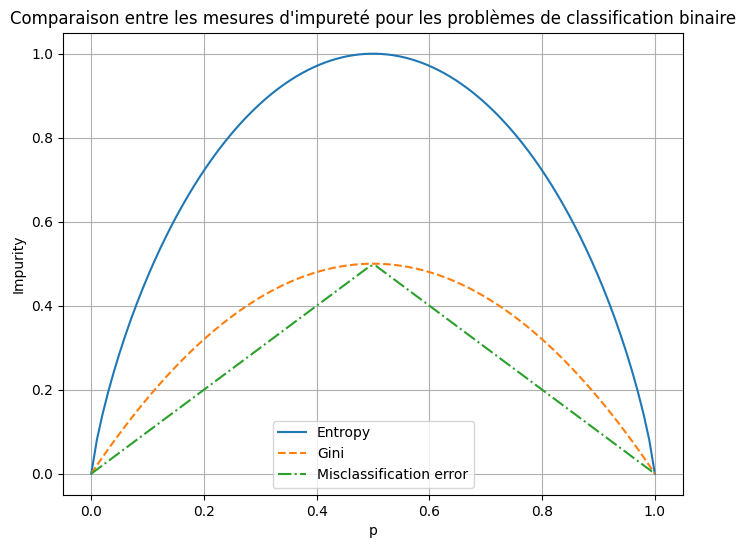

In [13]:
plt.figure(figsize=(8, 6))

plt.plot(x, y_entropy, label='Entropy')
plt.plot(x, y_gini, label='Gini', linestyle='--')
plt.plot(x, y_error, label='Misclassification error', linestyle='-.')

plt.title("Comparaison entre les mesures d'impureté pour les problèmes de classification binaire")
plt.xlabel("p")
plt.ylabel("Impurity")

plt.legend()
plt.grid(True)
plt.show()

## Exercice 2

In [14]:
from collections import Counter

In [15]:
# 2. (a) Fonction impurity_split
def get_probs_from_counts(counts):
    total = sum(counts.values())
    return [c/total for c in counts.values()]

def impurity_split(cnt, impurity_function):
    """
    Calcule l'impureté pondérée d'un split.
    cnt: Dictionnaire de la forme {"N1": {"C0":4, "C1":3}, ...}
    impurity_function: entropy, gini, ou classification_error
    """
    total_samples = sum(sum(node_counts.values()) for node_counts in cnt.values())
    weighted_impurity = 0

    for node, counts in cnt.items():
        n_samples_node = sum(counts.values())
        probs = get_probs_from_counts(counts)
        imp = impurity_function(probs)
        
        # Poids = (nombre d'exemples dans ce noeud) / (total exemples)
        weighted_impurity += (n_samples_node / total_samples) * imp
        
    return weighted_impurity

# Test demandé dans le sujet 
test_cnt = {"N1": {"C0":4, "C1":3}, "N2": {"C0":2, "C1":3}}

# Attendu ~0.486
print(f"Split Impurity (Gini, Test 1): {impurity_split(test_cnt, gini):.3f}") 

# --- Chargement des données Exercice 2 ---
header = ["Customer ID", "Gender", "Car Type", "Shirt Size", "Class"]
data_ex2 = [
    ["1", "M", "Family", "Small", "C0"],
    ["2", "M", "Sports", "Medium", "C0"],
    ["3", "M", "Sports", "Medium", "C0"],
    ["4", "M", "Sports", "Large", "C0"],
    ["5", "M", "Sports", "Extra Large", "C0"],
    ["6", "M", "Sports", "Extra Large", "C0"],
    ["7", "F", "Sports", "Small", "C0"],
    ["8", "F", "Sports", "Small", "C0"],
    ["9", "F", "Sports", "Medium", "C0"],
    ["10", "F", "Luxury", "Large", "C0"],
    ["11", "M", "Family", "Large", "C1"],
    ["12", "M", "Family", "Extra Large", "C1"],
    ["13", "M", "Family", "Medium", "C1"],
    ["14", "M", "Luxury", "Extra Large", "C1"],
    ["15", "F", "Luxury", "Small", "C1"],
    ["16", "F", "Luxury", "Small", "C1"],
    ["17", "F", "Luxury", "Medium", "C1"],
    ["18", "F", "Luxury", "Medium", "C1"],
    ["19", "F", "Luxury", "Medium", "C1"],
    ["20", "F", "Luxury", "Large", "C1"]
]

# Fonction utilitaire pour compter les classes par valeur d'attribut
def get_counts_for_split(dataset, attr_index, target_index):
    split_counts = {}
    for row in dataset:
        val = row[attr_index]
        label = row[target_index]
        
        if val not in split_counts:
            split_counts[val] = Counter()
        split_counts[val][label] += 1
    return split_counts

Split Impurity (Gini, Test 1): 0.486


In [16]:
# 2. (b) Gini du jeu de données complet
target_counts = Counter([row[4] for row in data_ex2])
total_gini = gini([c/len(data_ex2) for c in target_counts.values()])
print(f"\n2(b) Gini global du dataset: {total_gini:.3f}")


2(b) Gini global du dataset: 0.500


In [17]:
# 2. (c) Gini Customer ID 
# Chaque ID est unique -> noeuds purs -> Gini = 0.0
id_counts = get_counts_for_split(data_ex2, 0, 4)
gini_id = impurity_split(id_counts, gini)
print(f"2(c) Gini Customer ID: {gini_id:.3f}")

2(c) Gini Customer ID: 0.000


In [18]:
# 2. (d) Gini Gender
gender_counts = get_counts_for_split(data_ex2, 1, 4)
gini_gender = impurity_split(gender_counts, gini)
print(f"2(d) Gini Gender: {gini_gender:.3f}")

2(d) Gini Gender: 0.480


In [19]:
# 2. (e) Gini Car Type (Multiway)
car_counts = get_counts_for_split(data_ex2, 2, 4)
gini_car = impurity_split(car_counts, gini)
print(f"2(e) Gini Car Type (Multiway): {gini_car:.3f}")

2(e) Gini Car Type (Multiway): 0.163


In [20]:
# 2. (f) Gini Shirt Size (Multiway)
shirt_counts = get_counts_for_split(data_ex2, 3, 4)
gini_shirt = impurity_split(shirt_counts, gini)
print(f"2(f) Gini Shirt Size: {gini_shirt:.3f}")

2(f) Gini Shirt Size: 0.491


2. (g) Quel attribut est le meilleur : Gender, Car Type ou Shirt Size ?

L'attribut Car Type est le meilleur.

Justification : On choisit l'attribut qui minimise l'impureté pondérée (Indice de Gini le plus faible).
- Gini(Car Type) ≈ 0.163
- Gini(Gender) ≈ 0.480
- Gini(Shirt Size) ≈ 0.491
Car Type offre donc le meilleur gain de pureté.

2. (h) Expliquer pourquoi Customer ID ne doit pas être utilisé...

Bien que `Customer ID` ait l'indice de Gini le plus bas (0.0, car chaque noeud est pur avec 1 seul exemple), il ne doit pas être utilisé car il s'agit d'un identifiant unique.

Utiliser cet attribut conduit à du sur-apprentissage (**overfitting**) : l'arbre mémorise les données d'entraînement par coeur (chaque ID mène à une feuille) mais est incapable de généraliser sur de nouvelles données (car les futurs ID seront inconnus).

## Exercice 3

**Complexité O(n²)**

In [21]:
# --- Données Exercice 3 ---
data_ex3 = [
    ["1", "T", "T", 1.0, "+"],
    ["2", "T", "T", 6.0, "+"],
    ["3", "T", "F", 5.0, "-"],
    ["4", "F", "F", 4.0, "+"],
    ["5", "F", "T", 7.0, "-"],
    ["6", "F", "T", 3.0, "-"],
    ["7", "F", "F", 8.0, "-"],
    ["8", "T", "F", 7.0, "+"],
    ["9", "F", "T", 5.0, "-"]
]

def information_gain(parent_entropy, children_counts):
    return parent_entropy - impurity_split(children_counts, entropy)

# 3. (a) Entropie du jeu de données
target_ex3 = [row[4] for row in data_ex3]
counts_ex3 = Counter(target_ex3)
probs_ex3 = [c/len(data_ex3) for c in counts_ex3.values()]
parent_entropy = entropy(probs_ex3)
print(f"\n--- Exercice 3 ---\n3(a) Entropie globale: {parent_entropy:.3f}")

# 3. (b) Gain pour a1 et a2 
# a1 est à l'index 1, a2 à l'index 2
for i, name in [(1, "a1"), (2, "a2")]:
    counts = get_counts_for_split(data_ex3, i, 4)
    gain = information_gain(parent_entropy, counts)
    print(f"3(b) Gain {name}: {gain:.3f}")

# 3. (c) Attribut continu a3
# Il faut tester tous les splits possibles.
vals_a3 = sorted(list(set([row[3] for row in data_ex3])))
# Points de coupure
splits = [(vals_a3[i] + vals_a3[i+1])/2 for i in range(len(vals_a3)-1)]

best_gain_a3 = -1
best_split_val = -1

print("3(c) Splits continus a3:")
for split_val in splits:
    # Construire le dictionnaire de split binaire
    split_counts = {
        f"<={split_val}": Counter(),
        f">{split_val}": Counter()
    }
    for row in data_ex3:
        label = row[4]
        if row[3] <= split_val:
            split_counts[f"<={split_val}"][label] += 1
        else:
            split_counts[f">{split_val}"][label] += 1
            
    gain = information_gain(parent_entropy, split_counts)
    if gain > best_gain_a3:
        best_gain_a3 = gain
        best_split_val = split_val

print(f"   Meilleur split a3: <= {best_split_val}, Gain: {best_gain_a3:.3f}")


--- Exercice 3 ---
3(a) Entropie globale: 0.991
3(b) Gain a1: 0.229
3(b) Gain a2: 0.007
3(c) Splits continus a3:
   Meilleur split a3: <= 2.0, Gain: 0.143


**Complexité O(n)**

In [ ]:
import math
from collections import Counter

data_ex3_v2 = [
    ["1", "T", "T", 1.0, "+"],
    ["2", "T", "T", 6.0, "+"],
    ["3", "T", "F", 5.0, "-"],
    ["4", "F", "F", 4.0, "+"],
    ["5", "F", "T", 7.0, "-"],
    ["6", "F", "T", 3.0, "-"],
    ["7", "F", "F", 8.0, "-"],
    ["8", "T", "F", 7.0, "+"],
    ["9", "F", "T", 5.0, "-"]
]

def entropy_fast(counts, total):
    if total == 0: return 0
    ent = 0
    for count in counts.values():
        if count > 0:
            p = count / total
            ent -= p * math.log2(p)
    return ent

print("--- 3. (c) Algorithme optimisé: Splits continus O(n) ---")

# PREPARATION: Trier les données par a3
# Pour O(n), l'idéé est d'utiliser une bucle de recherche,
data_sorted = sorted(data_ex3_v2, key=lambda x: x[3])
n = len(data_sorted)

# INITIALISATION DES COMPTEURS (O(1) o O(C))
# "Gauche" commence vide, "Droite" a tout..
left_counts = Counter()
right_counts = Counter([row[4] for row in data_sorted])
total_left = 0
total_right = n

parent_entropy = entropy_fast(right_counts, total_right)

best_gain = -1
best_split_val = None

# SINGLE PASS -> O(n)
for i in range(n - 1):
    row = data_sorted[i]
    label = row[4]
    val = row[3]
    next_val = data_sorted[i+1][3]
    
    # --- MISE À JOUR PROGRESSIVE O(1) ---
    # Droite à gauche
    right_counts[label] -= 1
    left_counts[label] += 1
    total_right -= 1
    total_left += 1
    
    if val != next_val:
        ent_left = entropy_fast(left_counts, total_left)
        ent_right = entropy_fast(right_counts, total_right)
        
        weighted_ent = (total_left/n) * ent_left + (total_right/n) * ent_right
        gain = parent_entropy - weighted_ent
        
        split_point = (val + next_val) / 2
        print(f"   Split <= {split_point}: Gain = {gain:.3f}")
        
        if gain > best_gain:
            best_gain = gain
            best_split_val = split_point

print(f"\nMeilleur split a3: Split <= {best_split_val} avec Gain {best_gain:.3f}")

--- 3. (c) Algorithme optimisé: Splits continus O(n) ---
   Split <= 2.0: Gain = 0.143
   Split <= 3.5: Gain = 0.003
   Split <= 4.5: Gain = 0.073
   Split <= 5.5: Gain = 0.007
   Split <= 6.5: Gain = 0.018
   Split <= 7.5: Gain = 0.102

Resultado Óptimo: Split <= 2.0 con Gain 0.143


3. (d) Quel est le meilleur split (entre a1, a2 et a3), d’après le gain d’information ?

D'après le gain d'information :
- Gain(a1) = 0.229
- Gain(a2) = 0.007
- Gain(a3, meilleur split) = 0.143

Le meilleur attribut est `a1` car il maximise le gain d'information (0.229).

In [23]:
# --- Code pour les questions 3(e) et 3(f) ---

print("\n--- Exercice 3 (e) & (f) ---")

# Rappel des données Exercice 3
# Index: 1=a1, 2=a2, 4=Target Class
# data_ex3 a été défini précédemment

# 3. (e) Comparaison par Erreur de Classification
error_a1 = impurity_split(get_counts_for_split(data_ex3, 1, 4), classification_error)
error_a2 = impurity_split(get_counts_for_split(data_ex3, 2, 4), classification_error)

print(f"3(e) Taux d'erreur a1 : {error_a1:.3f}")
print(f"3(e) Taux d'erreur a2 : {error_a2:.3f}")
print(f"     -> Le meilleur est : {'a1' if error_a1 < error_a2 else 'a2'}")

# 3. (f) Comparaison par Indice de Gini
gini_a1 = impurity_split(get_counts_for_split(data_ex3, 1, 4), gini)
gini_a2 = impurity_split(get_counts_for_split(data_ex3, 2, 4), gini)

print(f"3(f) Gini a1 : {gini_a1:.3f}")
print(f"3(f) Gini a2 : {gini_a2:.3f}")
print(f"     -> Le meilleur est : {'a1' if gini_a1 < gini_a2 else 'a2'}")


--- Exercice 3 (e) & (f) ---
3(e) Taux d'erreur a1 : 0.222
3(e) Taux d'erreur a2 : 0.444
     -> Le meilleur est : a1
3(f) Gini a1 : 0.344
3(f) Gini a2 : 0.489
     -> Le meilleur est : a1


3. **(e) - Quel est le meilleur split (a1 vs a2) d'après l'erreur ?**

Le meilleur split est `a1`.
Justification : L'impureté (erreur de classification) de a1 (~0.222) est inférieure à celle de a2 (~0.444).

3. **(f) - Quel est le meilleur split (a1 vs a2) d'après Gini ?**

Le meilleur split est `a1`.
Justification : L'indice de Gini pondéré de a1 (~0.344) est inférieur à celui de a2 (~0.489).

## Exercice 4

In [24]:
from collections import Counter

# --- Données Exercice 4 ---
header = ["A", "B", "Class Label"]
data_ex4 = [
    ["T", "F", "+"],
    ["T", "T", "+"],
    ["T", "T", "+"],
    ["T", "F", "-"],
    ["T", "T", "+"],
    ["F", "F", "-"],
    ["F", "F", "-"],
    ["F", "F", "-"],
    ["T", "T", "-"],
    ["T", "F", "-"]
]

print("--- Exercice 4 ---")

# Calcul de l'entropie et Gini du noeud parent
target_counts = Counter([row[2] for row in data_ex4])
total_samples = len(data_ex4)
probs_parent = [c/total_samples for c in target_counts.values()]

parent_entropy = entropy(probs_parent)
parent_gini = gini(probs_parent)

print(f"Parent Entropy: {parent_entropy:.4f}")
print(f"Parent Gini:    {parent_gini:.4f}\n")

# Dictionnaires pour les splits
split_A = get_counts_for_split(data_ex4, 0, 2)
split_B = get_counts_for_split(data_ex4, 1, 2)

# --- 4. (a) Gain d'information (Entropy) ---
info_gain_A = parent_entropy - impurity_split(split_A, entropy)
info_gain_B = parent_entropy - impurity_split(split_B, entropy)

print(f"4(a) Gain d'information A : {info_gain_A:.4f}")
print(f"4(a) Gain d'information B : {info_gain_B:.4f}")

best_info_gain = "A" if info_gain_A > info_gain_B else "B"
print(f"     -> Meilleur split (Info Gain) : {best_info_gain}")

# --- 4. (b) Gain de l'indice de Gini ---
# Gini Gain = Gini(Parent) - Gini_Weighted(Children)
gini_weighted_A = impurity_split(split_A, gini)
gini_weighted_B = impurity_split(split_B, gini)

gini_gain_A = parent_gini - gini_weighted_A
gini_gain_B = parent_gini - gini_weighted_B

print(f"\n4(b) Gini Gain A : {gini_gain_A:.4f} (Weighted Impurity: {gini_weighted_A:.4f})")
print(f"4(b) Gini Gain B : {gini_gain_B:.4f} (Weighted Impurity: {gini_weighted_B:.4f})")

best_gini_gain = "A" if gini_gain_A > gini_gain_B else "B"
print(f"     -> Meilleur split (Gini)      : {best_gini_gain}")

# --- 4. (c) Discussion ---
print("\n4(c) Est-il possible que les mesures favorisent des attributs différents ?")
print(f"     OUI. Ici, l'Entropy favorise {best_info_gain} alors que Gini favorise {best_gini_gain}.")

--- Exercice 4 ---
Parent Entropy: 0.9710
Parent Gini:    0.4800

4(a) Gain d'information A : 0.2813
4(a) Gain d'information B : 0.2564
     -> Meilleur split (Info Gain) : A

4(b) Gini Gain A : 0.1371 (Weighted Impurity: 0.3429)
4(b) Gini Gain B : 0.1633 (Weighted Impurity: 0.3167)
     -> Meilleur split (Gini)      : B

4(c) Est-il possible que les mesures favorisent des attributs différents ?
     OUI. Ici, l'Entropy favorise A alors que Gini favorise B.


## Exercice 5

In [ ]:
import math

# --- 5. (a) Encodage des arbres et fonctions de coût ---

# Arbre de gauche (Fig. 2, gauche)
# Représentation donnée dans l'énoncé : ["C1", ["C2", "C3"]]
# Interprétation :
#   racine -> [feuille C1, noeud interne -> (feuille C2, feuille C3)]
tree_1_structure = ["C1", ["C2", "C3"]]

# Arbre de droite (Fig. 2, droite)
# Interprétation visuelle :
#   racine -> [sous-arbre gauche, sous-arbre droit]
#   gauche : ["C1", ["C1", "C2"]]
#   droite : ["C2", "C3"]
tree_2_structure = [["C1", ["C1", "C2"]], ["C2", "C3"]]

def get_tree_stats(node):
    """
    Parcours récursif de la structure (listes imbriquées) pour compter :
    - les noeuds internes (listes)
    - les feuilles (chaînes : "C1", "C2", "C3", ...)
    """
    if isinstance(node, list):
        # Noeud interne
        internal_count = 1
        leaf_count = 0
        for child in node:
            i, l = get_tree_stats(child)
            internal_count += i
            leaf_count += l
        return internal_count, leaf_count
    else:
        # Feuille
        return 0, 1

def cost_tree(tree_structure, m=16, k=3):
    """
    Cost(tree) = coût d'encodage de tous les nœuds de l'arbre.
    - m : nombre total d'attributs (ici 16)
    - k : nombre total de classes (ici 3)
    """
    num_internal, num_leaves = get_tree_stats(tree_structure)

    # Coût d'un noeud interne : ceil(log2(m)) bits
    cost_per_internal = math.ceil(math.log(m, 2))
    # Coût d'une feuille : ceil(log2(k)) bits
    cost_per_leaf = math.ceil(math.log(k, 2))

    return num_internal * cost_per_internal + num_leaves * cost_per_leaf

def cost_data_given_tree(num_errors, n_total_samples):
    """
    Cost(data | tree) = coût d'encodage des erreurs de classification.
    - chaque erreur coûte ceil(log2(n)) bits, où n est le nombre
      de tuples d'entraînement.
    """
    cost_per_error = math.ceil(math.log(n_total_samples, 2))
    return num_errors * cost_per_error

def mdl_total_cost(tree_structure, num_errors, n_total_samples, m=16, k=3):
    """
    Renvoie (coût_total, Cost(tree), Cost(data|tree))
    """
    c_tree = cost_tree(tree_structure, m=m, k=k)
    c_data = cost_data_given_tree(num_errors, n_total_samples)
    return c_tree + c_data, c_tree, c_data

# Nombre d'erreurs pour chaque arbre (donné dans la figure)
errors_t1 = 7   # arbre de gauche
errors_t2 = 4   # arbre de droite

print("--- Exercice 5 ---")
print("Arbre 1 : structure =", tree_1_structure)
print("Arbre 2 : structure =", tree_2_structure)

# Vérification des stats d'arbres
t1_internal, t1_leaves = get_tree_stats(tree_1_structure)
t2_internal, t2_leaves = get_tree_stats(tree_2_structure)
print(f"\nStats arbre 1 : {t1_internal} nœuds internes, {t1_leaves} feuilles")
print(f"Stats arbre 2 : {t2_internal} nœuds internes, {t2_leaves} feuilles")

# Coût fixe des arbres (indépendant de n)
print("\nCost(tree) (m = 16 attributs, k = 3 classes) :")
print(f"  Cost(tree1) = {cost_tree(tree_1_structure)} bits")
print(f"  Cost(tree2) = {cost_tree(tree_2_structure)} bits")

# --- 5. (b) Comparaison en fonction de n ---

test_n_values = [5, 8, 10, 16, 17, 50]

print("\nComparaison MDL pour différentes valeurs de n :\n")
print(f"{'n':<5} | {'Arbre':<8} | {'Cost(tree)':<12} | {'Cost(data)':<12} | {'TOTAL':<8} | Décision")
print("-" * 80)

for n in test_n_values:
    # Coût pour l'arbre 1
    c1_total, c1_tree, c1_data = mdl_total_cost(tree_1_structure, errors_t1, n)
    # Coût pour l'arbre 2
    c2_total, c2_tree, c2_data = mdl_total_cost(tree_2_structure, errors_t2, n)

    # Décision MDL avec gestion de l'égalité
    if c1_total < c2_total:
        decision = "T1 (plus simple)"
    elif c2_total < c1_total:
        decision = "T2 (plus complexe, moins d'erreurs)"
    else:
        decision = "Égalité (MDL neutre, Occam → T1)"

    # Ligne pour T1
    print(f"{n:<5} | {'T1':<8} | {c1_tree:<12} | {c1_data:<12} | {c1_total:<8} | {decision}")
    # Ligne pour T2
    print(f"{'':<5} | {'T2':<8} | {c2_tree:<12} | {c2_data:<12} | {c2_total:<8} |")
    print("-" * 80)


--- Exercice 5 ---
Arbre 1 : structure = ['C1', ['C2', 'C3']]
Arbre 2 : structure = [['C1', ['C1', 'C2']], ['C2', 'C3']]

Stats arbre 1 : 2 nœuds internes, 3 feuilles
Stats arbre 2 : 4 nœuds internes, 5 feuilles

Cost(tree) (m = 16 attributs, k = 3 classes) :
  Cost(tree1) = 14 bits
  Cost(tree2) = 26 bits

Comparaison MDL pour différentes valeurs de n :

n     | Arbre    | Cost(tree)   | Cost(data)   | TOTAL    | Décision
--------------------------------------------------------------------------------
5     | T1       | 14           | 21           | 35       | T1 (plus simple)
      | T2       | 26           | 12           | 38       |
--------------------------------------------------------------------------------
8     | T1       | 14           | 21           | 35       | T1 (plus simple)
      | T2       | 26           | 12           | 38       |
--------------------------------------------------------------------------------
10    | T1       | 14           | 28           | 42     

5. **(a) – Calcul des coûts**

Dans MDL, le coût total est défini par la formule:

$$MDL = Cost(tree) + Cost(data | tree)$$

* Un noeud interne coûte : $\lceil \log_2(16) \rceil = \mathbf{4 \text{ bits}}$
* Une feuille coûte : $\lceil \log_2(3) \rceil = \mathbf{2 \text{ bits}}$ 

**Arbre 1**
Structure : `["C1", ["C2", "C3"]]`
* 2 noeuds internes, 3 feuilles 
* $\mathbf{Cost(tree_1) = 14 \text{ bits}}$
* 7 erreurs $\rightarrow Cost(data|tree_1) = 7 \times \lceil \log_2(n) \rceil$ 
* **Total :**
    $$MDL_1 = 14 + 7 \lceil \log_2(n) \rceil$$

**Arbre 2**
Structure : `[["C1", ["C1", "C2"]], ["C2", "C3"]]`
* 4 noeuds internes, 5 feuilles 
* $\mathbf{Cost(tree_2) = 26 \text{ bits}}$
* 4 erreurs $\rightarrow Cost(data|tree_2) = 4 \times \lceil \log_2(n) \rceil$ 
* **Total :**
    $$MDL_2 = 26 + 4 \lceil \log_2(n) \rceil$$

5. **(b) – Comparaison des deux arbres**

Posons $L = \lceil \log_2(n) \rceil$.
La différence est:

$$MDL_1 - MDL_2 = -12 + 3L$$

**Résultats :**
* Si $\mathbf{n \le 8}$ ($L = 3$) $\rightarrow MDL_1 < MDL_2 \rightarrow$ **Arbre 1** meilleur.
* Si $\mathbf{9 \le n \le 16}$ ($L = 4$) $\rightarrow$ égalité $\rightarrow$ Occam $\rightarrow$ **Arbre 1**.
* Si $\mathbf{n \ge 17}$ ($L \ge 5$) $\rightarrow MDL_2 < MDL_1 \rightarrow$ **Arbre 2** meilleur.

**Conclusion :**
* Petits $n \rightarrow$ **Arbre 1**
* Grands $n \rightarrow$ **Arbre 2**
* Le changement se produit à $\mathbf{n = 17}$

## Exercice 6

In [26]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [27]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import itertools

print("--- Exercice 6 : Fonction Parité et Scikit-Learn ---")

# --- 6. (a) Génération du jeu de données (Parité 4 bits) ---
# On génère toutes les combinaisons de 4 bits (0 ou 1)
# 2^4 = 16 tuples
inputs = list(itertools.product([0, 1], repeat=4))
feature_names = ["A", "B", "C", "D"]

# La classe est la parité : somme des bits modulo 2
# Si somme impaire -> 1, sinon -> 0
y = [sum(row) % 2 for row in inputs]
X = np.array(inputs)

# Création d'un DataFrame pour visualiser
df = pd.DataFrame(X, columns=feature_names)
df["Class"] = y
print("Aperçu du jeu de données (5 premières lignes) :")
print(df.head())


--- Exercice 6 : Fonction Parité et Scikit-Learn ---
Aperçu du jeu de données (5 premières lignes) :
   A  B  C  D  Class
0  0  0  0  0      0
1  0  0  0  1      1
2  0  0  1  0      1
3  0  0  1  1      0
4  0  1  0  0      1


In [28]:
# --- 6. (b) Entraînement et Limitation des Types ---
# Scikit-learn requiert des données numériques.
# Si nous avions des chaînes "T"/"F", il faudrait les encoder (ex: T=1, F=0).
clf = DecisionTreeClassifier(criterion='entropy', random_state=None) # random_state non fixé pour observer les changements
clf.fit(X, y)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


6. **(b) - Quelle limitation observez-vous concernant le type de données ?**

Scikit-Learn n'accepte que des matrices numériques en entrée.
Il ne peut pas gérer nativement des attributs catégoriels (chaînes de caractères comme `T`, `F`, `Rouge`).
Il est nécessaire de pré-traiter les données (Encoding) pour les transformer en nombres.


--- Réponse 6(c) : Changements observés ---


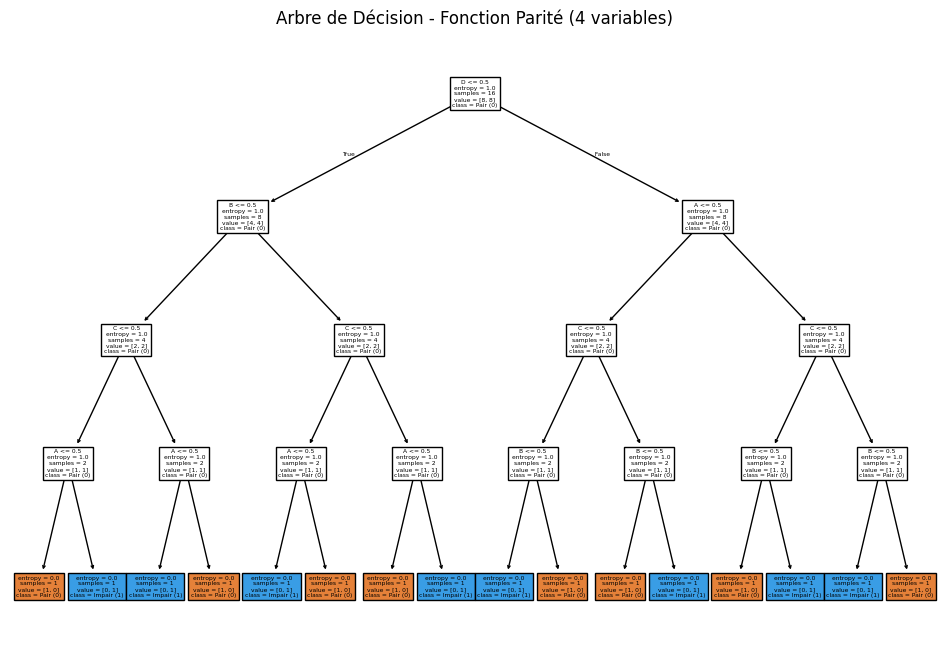

In [29]:
# --- 6. (c) Génération et Visualisation des arbres ---
print("\n--- Réponse 6(c) : Changements observés ---")

# On affiche l'arbre généré
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, feature_names=feature_names, class_names=["Pair (0)", "Impair (1)"], filled=True)
plt.title("Arbre de Décision - Fonction Parité (4 variables)")
plt.show()

6. **(c) Quels changements observez-vous entre des générations successives ? que vous changez des paramètres (tel que la mesure d'impureté) ou que vous ne changez aucun paramètre ?"**

 - 1. **Instabilité Structurelle** : Comme le Gain d'Information est nul pour chaque variable prise isolément (problème *XOR*), l'algorithme choisit le split initial au hasard (s'il y a égalité). Si on relance l'entraînement sans fixer `random_state`, la structure de l'arbre change complètement.

- 2. **Complexité** : L'arbre est 'complet' (profond et large). Les arbres de décision sont mauvais pour apprendre la fonction parité car ils doivent tester toutes les combinaisons.